In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("theft.xlsx")
df.sample(5)

,Region,Sub Region,Country,Count,Rate,Year
849,Asia,Western Asia,Israel,70809,935.541212,2011
412,Europe,Eastern Europe,Hungary,124522,1242.252631,2007
696,Americas,Central America,Belize,836,259.943782,2010
390,Asia,Eastern Asia,Hong Kong Special Administrative Region of China,36762,532.906413,2007
1011,Africa,Eastern Africa,Uganda,18146,48.320105,2013


In [9]:
df["Year"].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

In [17]:
dfg = df.groupby("Country").agg({"Count": "sum", "Rate":"mean", "Year": "last" })
dfg

,Count,Rate,Year
Country,,,
Albania,55135,155.732120,2016
Algeria,503764,138.175460,2015
Andorra,9213,1245.890066,2015
Argentina,1973821,684.376679,2016
Armenia,53275,130.385450,2016
...,...,...,...
United Kingdom (Scotland),1582686,2167.057437,2016
United Republic of Tanzania,2644,1.292696,2015
United States of America,88604714,2070.255291,2016


In [23]:
dfg_sorted = dfg.sort_values(by=["Count", "Year"],ascending=False )
dfg_sorted

,Count,Rate,Year
Country,,,
United States of America,88604714,2070.255291,2016
Germany,23524591,2063.732022,2016
United Kingdom (England and Wales),21816558,2824.315003,2016
Russian Federation,15203337,815.245719,2016
France,15137111,1716.158535,2016
...,...,...,...
St. Kitts and Nevis,1577,1022.307558,2011
Guinea,1348,13.350861,2007
Madagascar,646,0.463441,2015


C:\Users\bocci\AppData\Local\Temp\ipykernel_1156\2805446548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfg_top20, x="Count", y="Country", palette="viridis")


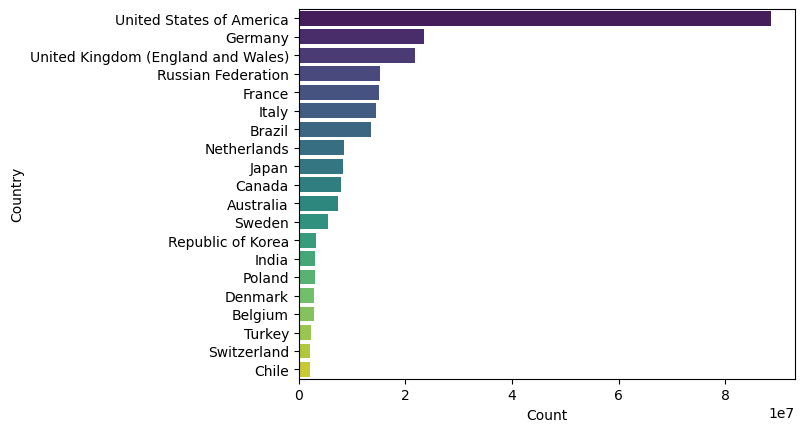

In [53]:
dfg_top20 = dfg_sorted.head(20)
sns.barplot(data=dfg_top20, x="Count", y="Country", palette="viridis") 
plt.savefig("plot.png", bbox_inches="tight")

In [27]:
dfg_sorted.loc["Argentina"]

Count    1.973821e+06
Rate     6.843767e+02
Year     2.016000e+03
Name: Argentina, dtype: float64

In [31]:
dfg_sorted.reset_index(inplace=True)
dfg_sorted

,Country,Count,Rate,Year
0,United States of America,88604714,2070.255291,2016
1,Germany,23524591,2063.732022,2016
2,United Kingdom (England and Wales),21816558,2824.315003,2016
3,Russian Federation,15203337,815.245719,2016
4,France,15137111,1716.158535,2016
...,...,...,...,...
137,St. Kitts and Nevis,1577,1022.307558,2011
138,Guinea,1348,13.350861,2007
139,Madagascar,646,0.463441,2015
140,Sao Tome and Principe,43,4.087118,2011
